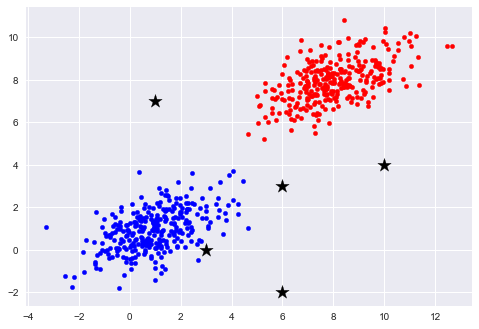

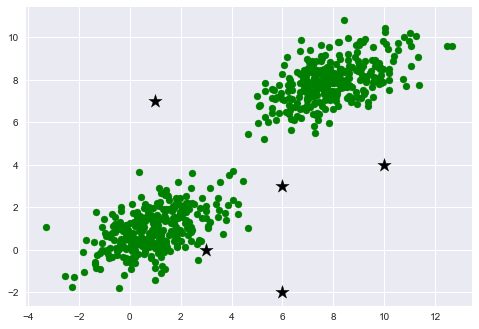

(6,3) ==> 0.0
(10,4) ==> 0.0
(6,-2) ==> 0.0
(1,7) ==> 1.0
(3,0) ==> 1.0


In [1]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

mean1=[8,8]
covar1=[[2,0.7],[0.7,1]]
d1=np.random.multivariate_normal(mean1,covar1,300)

mean2=[1,1]
covar2=[[2,0.7],[0.7,1]]
d2=np.random.multivariate_normal(mean2,covar2,300)

df_rows=d1.shape[0]+d2.shape[0]
df_columns=d1.shape[1]+1
df=np.zeros((df_rows,df_columns))
df[0:d1.shape[0],0:2]=d1
df[d1.shape[0]:,0:2]=d2
df[0:d1.shape[0],2]=0
df[d1.shape[0]:,2]=1


import random
x_cord_test = [random.randint(-2,10) for i in range(5)]
y_cord_test = [random.randint(-2,10) for i in range(5)]
test_data = []
for i in range(len(x_cord_test)):
    test_data.append([x_cord_test[i],y_cord_test[i]])

plt.style.use('seaborn')
plt.scatter(d1[:,0],d1[:,1],color="Red",s=20)
plt.scatter(d2[:,0],d2[:,1],color="Blue",s=20)
for i in test_data:
    plt.scatter(i[0],i[1],marker="*",s=200,color="black")
plt.show()

plt.scatter(df[:,0],df[:,1],color="Green")
for i in test_data:
    plt.scatter(i[0],i[1],marker="*",s=200,color="black")
plt.show()

model = CatBoostClassifier(iterations=100,task_type="GPU")
model.fit(df[:,0:2],df[:,2],verbose=False)

for i in test_data:
    x=model.predict(i)
    print("({},{}) ==> {}".format(i[0],i[1],x))